In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
# import data
df = pd.read_csv('data/processed.cleveland.data', header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df.columns=['age',
'sex',
'cp',
'trestbps',
'chol',
'fbs',
'restecg',
'thalach',
'exang',
'oldpeak',
'slope',
'ca',
'thal',
'hd']

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
### identify the missing data

In [8]:
df.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
hd            int64
dtype: object

In [9]:
df['ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [10]:
df['thal'].value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

In [11]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [12]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [13]:
### handling missing data (scikit learn DT class dont support missing value)

In [19]:
missing_rows_df = df.loc[(df['ca'] == '?') | (df['thal'] == '?')]

In [20]:
len(missing_rows_df)

6

In [21]:
len(df)

303

In [23]:
(len(missing_rows_df) / len(df))  * 100

1.9801980198019802

In [25]:
#### Very less percentage of data has missing values. ( removing)

In [27]:
df_not_missing_data = df.loc[(df['ca'] != '?') & (df['thal'] != '?')]

In [28]:
len(df_not_missing_data)

297

In [29]:
X = df_not_missing_data.drop('hd', axis=1).copy()

In [30]:
y = df_not_missing_data['hd'].copy()

In [31]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [32]:
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

In [33]:
y.unique()

array([0, 2, 1, 3, 4])

In [34]:
y.value_counts()

0    160
1     54
2     35
3     35
4     13
Name: hd, dtype: int64

In [35]:
X.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
dtype: object

In [36]:
### Some categorical variables are in float64, need to convert using one-hot encoding.

In [37]:
X['cp'].uniqueque()

array([1., 4., 3., 2.])

In [38]:
pd.get_dummies(X, columns=['cp']).head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [40]:
### columns with categorical values
### 'cp', 'restecg', 'slope', 'thal'

In [49]:
X_encoded = pd.get_dummies(X, columns=['cp', 'restecg', 'slope', 'thal'])

In [50]:
X_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [43]:
y.unique()

array([0, 2, 1, 3, 4])

In [47]:
y.value_counts()

0    160
1    137
Name: hd, dtype: int64

In [44]:
### for now considering only two classes, but y has multiple classes

In [45]:
y_not_zero_index = y > 0
y[y_not_zero_index] = 1
y.unique()

array([0, 1])

In [46]:
y.value_counts()

0    160
1    137
Name: hd, dtype: int64

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

In [52]:
clf_dt = DecisionTreeClassifier(random_state=42)

In [54]:
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

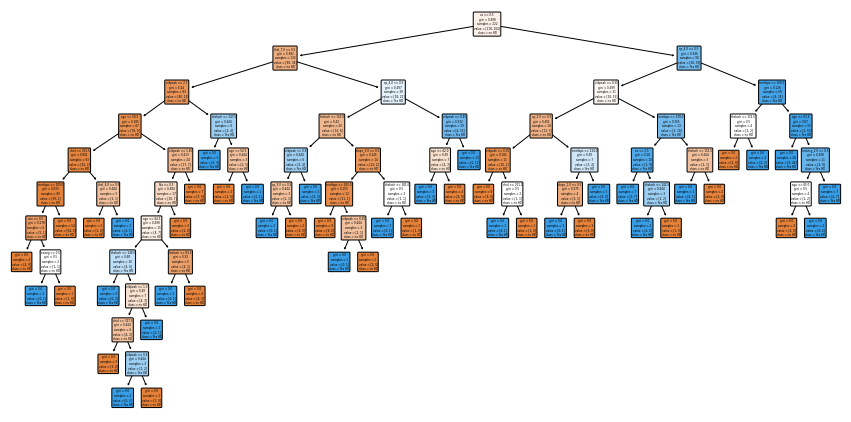

In [55]:
plt.figure(figsize=(15, 7.5))
dummpy = plot_tree(clf_dt,
                   filled=True,
                   rounded=True,
                   class_names=['no HD','Yes HD'],
                   feature_names=X_encoded.columns)

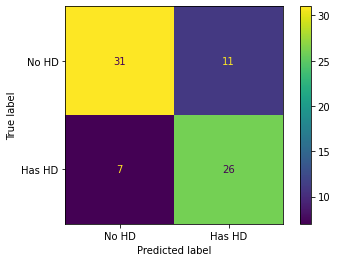

In [56]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=['No HD', 'Has HD'])

In [67]:
### Accuracy of the fit is

In [66]:
clf_dt.score(X_train, y_train) * 100

75.67567567567568

In [69]:
### Pruning the tree to increase accuracy
## There are two types considered
## 1) Cost complexity pruning
## 2) Using cross validation

In [63]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_aplhas = path.ccp_alphas # get the different values of alpha
ccp_alphas = ccp_aplhas[:-1] # maximum one excluded as it indicates removing all the leaves in the tree

clf_dts = []

# for each alpha, caluculate the decision tree
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

In [64]:
len(clf_dts)

26

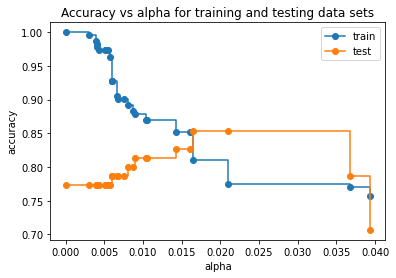

In [68]:
# plot the accuracy for the training and testing data set for alpha values
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fix, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing data sets')
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

In [70]:
## 2) Now usinf cross validation to see of we get a better alpha value to use

<AxesSubplot:xlabel='tree'>

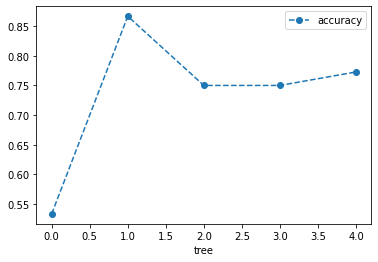

In [71]:
# from above we cann that the optimal value for aplha can be 0.016

# cross valication across the test and train data with same ccp aplha value
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)
scores = cross_val_score(clf_dt, X_train, y_train, cv=5) # cv=5, 5 different train-test data
df = pd.DataFrame(data={'tree': range(0,5), 'accuracy': scores})
df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

In [72]:
# from the above there is lot of variation in the accuracy, 
# even when using the same alpha value with different data sets.

# this suggests that the alpha value is sensitive to data sets.

# use cross validation to find the optimal value for alpha.

alpha_loop_values = []

<AxesSubplot:xlabel='alpha'>

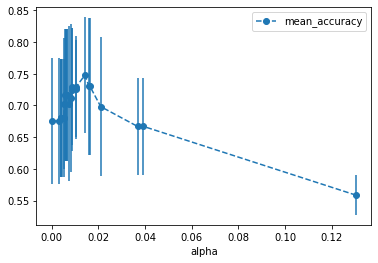

In [73]:
# for each aplha value, cv is run 
for ccp_alpha in ccp_aplhas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5) # cv=5, 5 different train-validation data
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha','mean_accuracy','std'])

alpha_results.plot(x='alpha', y='mean_accuracy', yerr='std', marker='o', linestyle='--')

In [76]:
# from above the optimal value could be 0.014 - 0.015
alpha_results[(alpha_results['alpha'] > 0.014) & (alpha_results['alpha'] < 0.015)]

,alpha,mean_accuracy,std
20,0.014225,0.747778,0.091395


In [77]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.014) & (alpha_results['alpha'] < 0.015)]['alpha']
ideal_ccp_alpha

20    0.014225
Name: alpha, dtype: float64

In [78]:
# convert to the float value.
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.014224751066856332

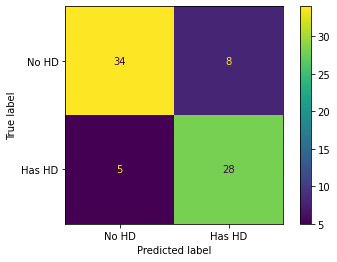

In [79]:
# build the model using the new alpha and verify the accuracy
clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ideal_ccp_alpha)
clf_dt.fit(X_train, y_train)
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=['No HD', 'Has HD'])

In [81]:
clf_dt.score(X_test, y_test) * 100  # improved accuracy.

82.66666666666667

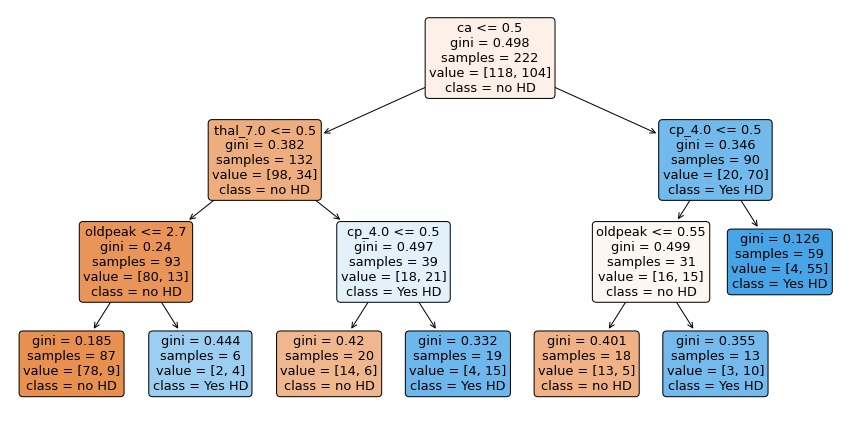

In [82]:
plt.figure(figsize=(15, 7.5))
dummpy = plot_tree(clf_dt,
                   filled=True,
                   rounded=True,
                   class_names=['no HD','Yes HD'],
                   feature_names=X_encoded.columns)